### Descriptive Statistic: Finding Meaning in Data

In [4]:
from scipy import stats
from sklearn.datasets import make_blobs, make_regression, load_iris
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

### Distributions and Simple Stats

lets build a simple dataset:

In [2]:
data = np.array([5, 5, 3, 4, 2, 5, 7, 8, 8, 1, 2])
len(data)

11

one natural place to begin is to ask about where the middle of data is

But what does this mean? there arevthree common interpretation

    authmetic mean: summof values / numof values
    median: value with as many vaalues above it as below it
    mode: the most frequent value

these three could amount to the same thing. 
if my dataset S ={1, 2, 3}, then: mean(S) = median(S) = mode(S) = 2



In [3]:
print(np.mean(data))
print(np.median(data))
print(stats.mode(data)[0][0])

4.545454545454546
5.0
5


the maen is the point that minimize the sum of squared differences for a given set of data

lets prove this:

In [4]:
X = [1, 2, 3, 5, 9]

mean_cands = np.linspace(-10, 10, 201)

sse = [sum([(x -cand)**2 for x in X]) for cand in mean_cands]

min(sse), sse.index(min(sse))

(40.0, 140)

this index of 140 corresponds to -10 + 14 =4, which is our mean!

In [5]:
np.mean(X)

4.0

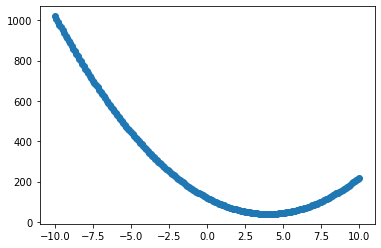

In [9]:
fig, ax = plt.subplots()

ax.scatter(mean_cands, sse);

By contrast the median is the point that minimizes the sum of absolute differences.

Proof:
   


In [13]:
fake_data =np.array([3, 4, 5, 6])
def d_prime(data, k):
    if k not in data:
        return sum((k-data) / abs(k-data))

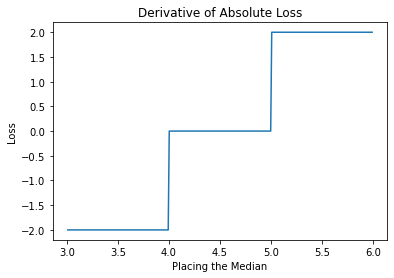

In [14]:
fig, ax = plt.subplots()
K = np.linspace(3, 6, 300)
y = [d_prime(fake_data, k)for k in K]
ax.plot(K, y)
plt.title('Derivative of Absolute Loss')
plt.xlabel('Placing the Median')
plt.ylabel('Loss');

By conventional defination of the median in cases of an even number of data points.

In [16]:
med_cands = mean_cands

sae = [sum([abs(x - cand) for x in X]) for cand in med_cands]

min(sae), sae.index(min(sae))

(11.0, 130)

this index of 130 corresponds tp -10 + 13 = 3, which is our median!

In [18]:
np.median(X)

3.0

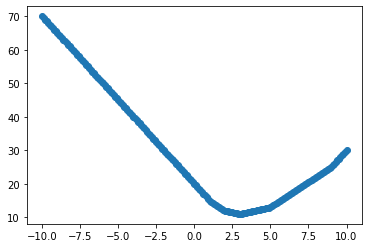

In [19]:
fig, ax = plt.subplots()

ax.scatter(med_cands, sae);

In [20]:
counts = np.unique(data, return_counts=True)
counts

(array([1, 2, 3, 4, 5, 7, 8]), array([1, 2, 1, 1, 3, 1, 2], dtype=int64))

Anotherbnatural question is about the spread of the data.

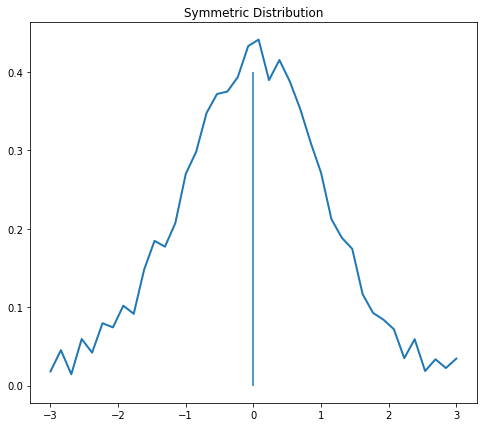

In [22]:
X = np.linspace(-3, 3, 40)
y = stats.norm.pdf(X) + 0.05 * np.random.rand(40)

fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(X, y, lw=2)
ax.vlines(x=0, ymin=0, ymax=0.4)
plt.title('Symmetric Distribution');

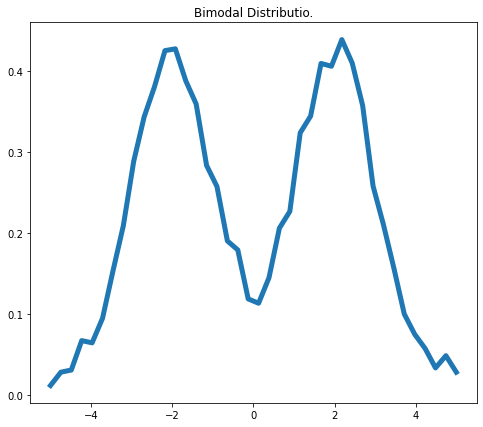

In [26]:
X = np.linspace(-5, 5, 40)
y = stats.norm.pdf(X, loc=-2) + stats.norm.pdf(X, loc=2)\
+ 0.05 * np.random.rand(40)

fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(X, y, lw=5)
plt.title('Bimodal Distributio.');

### Histograms

One natural way of visualizing a datadset is to construct a histogram, which is a simple count of the different values existing in the dataset.

Very often there will be many distinct values, especially if the dimnsion in question is a continuum. in that case, one will often need to 
make a decision about how many bins to use in constructing the histogram i.e, about how to group the different values 

In [28]:
data

array([5, 5, 3, 4, 2, 5, 7, 8, 8, 1, 2])

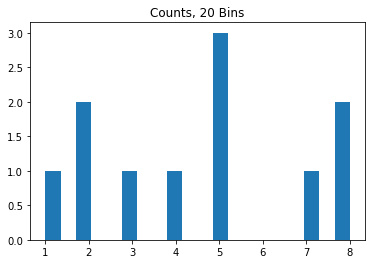

In [30]:
fig, ax = plt.subplots()
ax.hist(data, bins=20)
plt.title('Counts, 20 Bins');

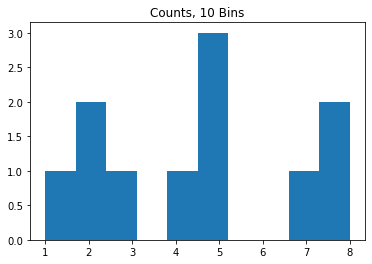

In [33]:
fig, ax = plt.subplots()
ax.hist(data, bins=10)
plt.title('Counts, 10 Bins');

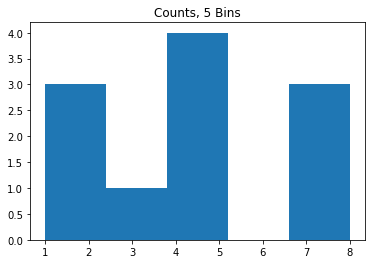

In [34]:
fig, ax = plt.subplots()
ax.hist(data, bins=5)
plt.title('Counts, 5 Bins');

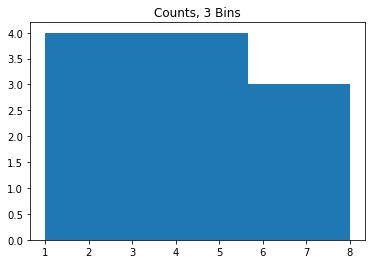

In [35]:
fig, ax = plt.subplots()
ax.hist(data, bins=3)
plt.title('Counts, 3 Bins');

### Sklearn.dataseys

In [36]:
X, s = make_blobs(random_state=42)
s.reshape(-1, 1)

array([[2],
       [1],
       [0],
       [1],
       [2],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [2],
       [2],
       [0],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [0],
       [0],
       [0],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [2],
       [0],
       [1],
       [0],
       [0],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [0],
       [2],
       [2],
       [2],
       [0],
       [0],
       [1],
       [0],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [0],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [0],
       [1],
       [0],
    

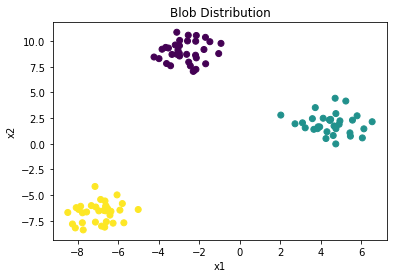

In [37]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=s)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Blob Distribution');

In [38]:
x1, x2 = X[:, 0], X[:, 1]

In [39]:
# let's discribe x1 ans x2 in statistical terms!

print(f"The maximun of x1 is {x1.max()}.")
print(f"The average of x1 is {x1.mean()}.")
print(f"The minimum of x1 is {x1.min()}.")
print(f"The standard deviation of x1 is {x1.std()}.")
print(f"The interquartile range of x1 is\
{np.percentile(x1, q=75) - np.percentile(x1, q=25)}.")

The maximun of x1 is 6.526064737438632.
The average of x1 is -1.7162792045591917.
The minimum of x1 is -8.487110425712498.
The standard deviation of x1 is 4.78019279035566.
The interquartile range of x1 is10.272947443608192.


In [41]:
print(f"The maximun of x2 is {x2.max()}.")
print(f"The average of x2 is {x2.mean()}.")
print(f"The minimum of x2 is {x2.min()}.")
print(f"The standard deviation of x2 is {x2.std()}.")
print(f"The interquartile range of x2 is\
{np.percentile(x2, q=75) - np.percentile(x2, q=25)}.")

The maximun of x2 is 10.86656431270726.
The average of x2 is 1.474850767353032.
The minimum of x2 is -8.39495681796181.
The standard deviation of x2 is 6.47257305323962.
The interquartile range of x2 is14.40746345577579.


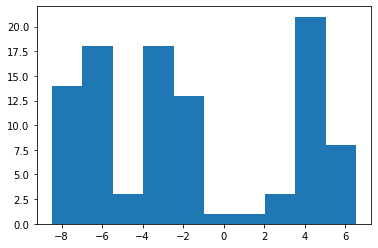

In [43]:
fig, ax =plt.subplots()
ax.hist(x1);

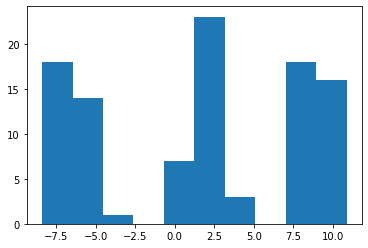

In [44]:
fig, ax =plt.subplots()
ax.hist(x2);

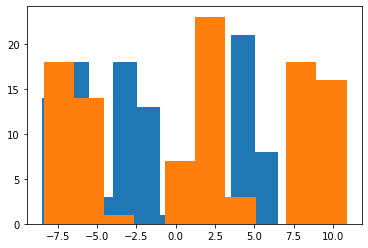

In [45]:
fig, ax =plt.subplots()
ax.hist(x1)
ax.hist(x2);

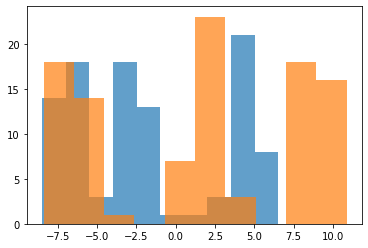

In [46]:
fig, ax =plt.subplots()
ax.hist(x1, alpha=0.7)
ax.hist(x2, alpha=0.7);

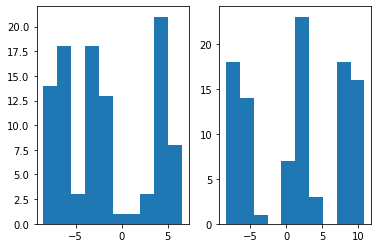

In [48]:
fig, ax =plt.subplots(1, 2)
ax[0].hist(x1)
ax[1].hist(x2);

In [50]:
df = pd.DataFrame(np.concatenate([X, s.reshape(-1, 1)], axis=1),
                 columns=['x1', 'x2', 'y'])
df.head()

,x1,x2,y
0,-7.726421,-8.394957,2.0
1,5.453396,0.742305,1.0
2,-2.978672,9.556846,0.0
3,6.042673,0.571319,1.0
4,-6.521840,-6.319325,2.0


In [51]:
df['y'].dtype

dtype('float64')

In [52]:
df['y'] = df['y'].astype(int)

In [53]:
df['y'].dtype

dtype('int32')

In [54]:
df.describe

<bound method NDFrame.describe of           x1        x2  y
0  -7.726421 -8.394957  2
1   5.453396  0.742305  1
2  -2.978672  9.556846  0
3   6.042673  0.571319  1
4  -6.521840 -6.319325  2
..       ...       ... ..
95 -3.186120  9.625962  0
96 -1.478198  9.945566  0
97  4.478593  2.377221  1
98 -5.796576 -5.826308  2
99 -3.348415  8.705074  0

[100 rows x 3 columns]>

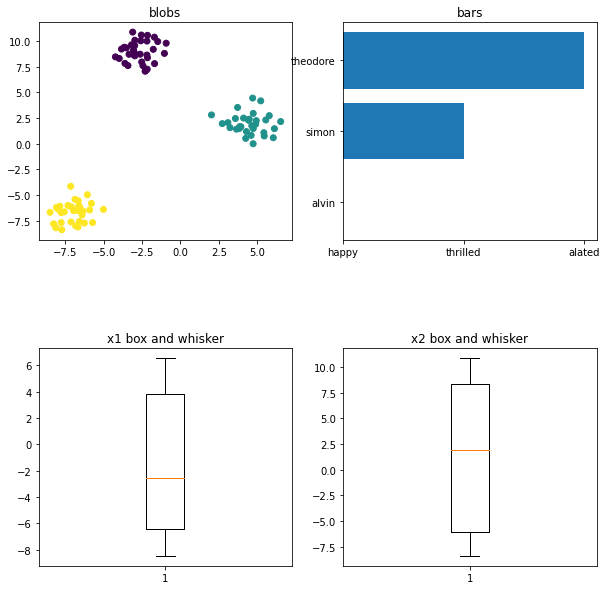

In [57]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)
ax[0][0].title.set_text('blobs')
ax[0][0].scatter(x1, x2, c=s);
ax[0][1].title.set_text('bars')
ax[0][1].barh(['alvin', 'simon', 'theodore'], ['happy', 'thrilled', 'alated'])
ax[1][0].title.set_text('x1 box and whisker')
ax[1][0].boxplot(x1)
ax[1][1].title.set_text('x2 box and whisker')
ax[1][1].boxplot(x2);

C:\Users\Zachary_B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Zachary_B\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:>

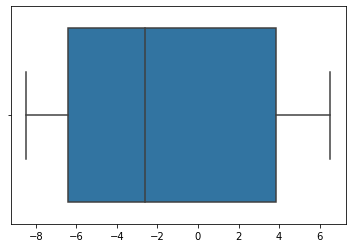

In [59]:
sns.boxplot(x1, orient='v')

### Regression plot

In [60]:
P, T = make_regression(n_features=1, noise = 20)
P.shape

(100, 1)

C:\Users\Zachary_B\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

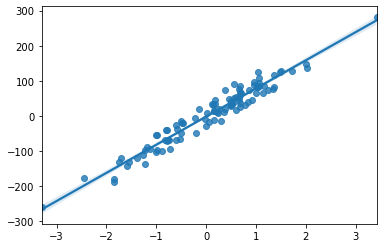

In [61]:
sns.regplot(P, T)

### Rock Music Data

lets see what stats or graphs we can pull out of this data set about rock songs.

In [16]:
songs = pd.read_csv("C:\\Users\\Zachary_B\\Desktop\\dataset\\classic-rock-song-list.csv")
songs.head()

,Song Clean,ARTIST CLEAN,Release Year,COMBINED,First?,Year?,PlayCount,F*G
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1


we could make a histogram of the song play counts

<AxesSubplot:>

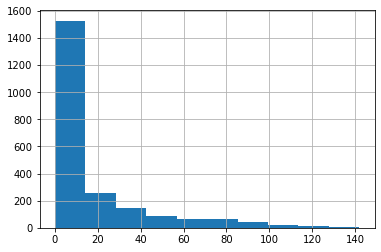

In [18]:
songs['PlayCount'].sort_values().hist()

we might also group the artist:

In [21]:
songs.groupby('ARTIST CLEAN').count()['Song Clean'].sort_values(ascending=False)

nums_sorted = songs.groupby('ARTIST CLEAN')\
.count()['Song Clean'].sort_values(ascending=False)

x = pd.DataFrame(nums_sorted)
x

,Song Clean
ARTIST CLEAN,
The Beatles,100
Led Zeppelin,69
Rolling Stones,55
Van Halen,44
Pink Floyd,39
...,...
Everlast,1
Rory Gallagher,1
Royal Bliss,1


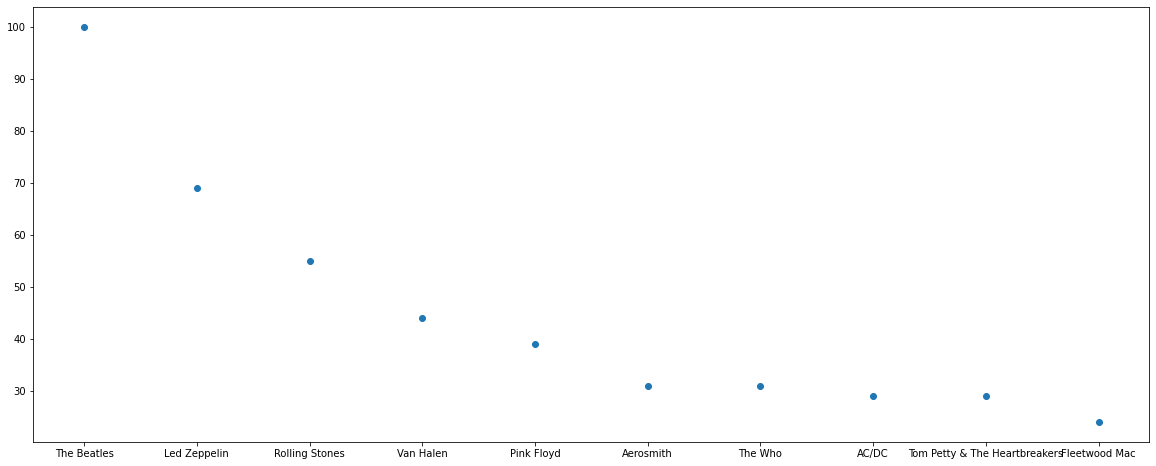

In [22]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.scatter(nums_sorted[:10].index, nums_sorted[:10]);

In [23]:
nums_sorted.skew()

5.6284210275083115

In [24]:
nums_sorted.kurt()

47.75001636743932

### The Iris Dataset

In [25]:
data = load_iris()

In [26]:
X = data.data
y = data.target

data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
# print(data.descr)

In [7]:
df = pd.DataFrame(np.hstack([X, y.reshape(-1, 1)]),
               columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wed', 'spec'])

In [8]:
df

,sepal_len,sepal_wid,petal_len,petal_wed,spec
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [27]:
df['spec'] = df['spec'].astype(int)

In [28]:
cypher = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

df['spec'] = df['spec'].map(cypher)

df

,sepal_len,sepal_wid,petal_len,petal_wed,spec
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### More Seaborn Tools

### categorical plots

 Swarm Plot

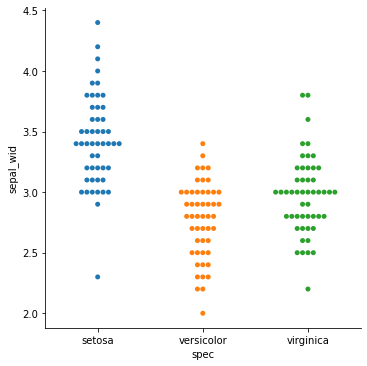

In [29]:
sns.catplot(x="spec", y="sepal_wid",
            kind='swarm', data=df);

### Violin Plot

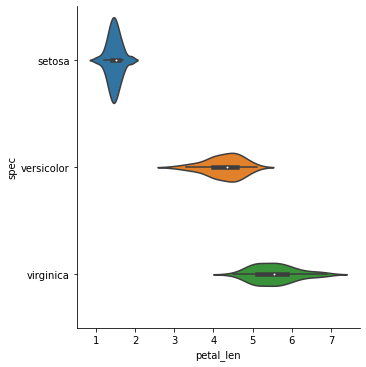

In [30]:
sns.catplot(x = 'petal_len', y = 'spec',
           kind = 'violin', data=df);

### Point Plot

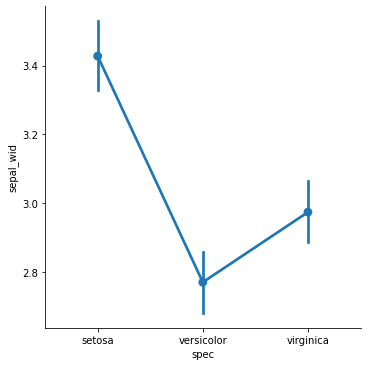

In [31]:
sns.catplot(x = 'spec', y = 'sepal_wid',
           kind = 'point', data=df);

### Relational Plot

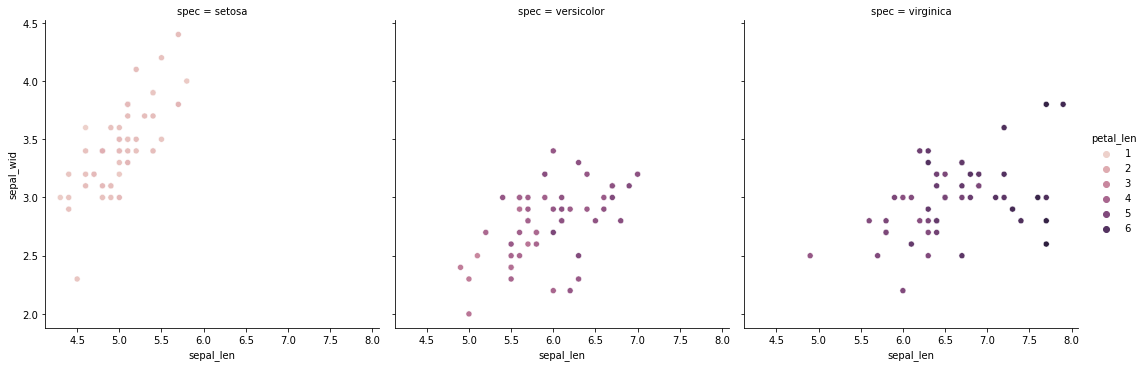

In [35]:
sns.relplot(x="sepal_len", y="sepal_wid", col="spec",
           hue="petal_len", sizes="petal_wid",
            data=df);